In [9]:
import covid19pandas as cod

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime

In [10]:
country = "US"

data = cod.get_data_jhu(data_type="all")
data = data.drop(columns="recovered") 
data = data[data["Country/Region"] == country] 
data = data[["date", "cases", "deaths"]] 
data = data.groupby("date").aggregate(np.sum) 
data = data.reset_index()
data.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,cases,deaths
0,2020-01-22,1,0
1,2020-01-23,1,0
2,2020-01-24,2,0
3,2020-01-25,2,0
4,2020-01-26,5,0
5,2020-01-27,5,0
6,2020-01-28,5,0
7,2020-01-29,6,0
8,2020-01-30,6,0
9,2020-01-31,8,0


In [11]:
data.tail(10)

,date,cases,deaths
342,2020-12-29,19514313,338722
343,2020-12-30,19745497,342459
344,2020-12-31,19974564,345859
345,2021-01-01,20132054,347894
346,2021-01-02,20433912,350290
347,2021-01-03,20643229,351646
348,2021-01-04,20819087,353502
349,2021-01-05,21049605,357269
350,2021-01-06,21299340,361123
351,2021-01-07,21574043,365208


In [12]:
country = "Vietnam"

data = cod.get_data_jhu(data_type="all")
data = data.drop(columns="recovered") 
data = data[data["Country/Region"] == country] 
data = data[["date", "cases", "deaths"]] 
data = data.groupby("date").aggregate(np.sum) 
data = data.reset_index()
data.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,cases,deaths
0,2020-01-22,0,0
1,2020-01-23,2,0
2,2020-01-24,2,0
3,2020-01-25,2,0
4,2020-01-26,2,0
5,2020-01-27,2,0
6,2020-01-28,2,0
7,2020-01-29,2,0
8,2020-01-30,2,0
9,2020-01-31,2,0


In [13]:
data.tail(10)

,date,cases,deaths
342,2020-12-29,1454,35
343,2020-12-30,1456,35
344,2020-12-31,1465,35
345,2021-01-01,1474,35
346,2021-01-02,1482,35
347,2021-01-03,1494,35
348,2021-01-04,1497,35
349,2021-01-05,1504,35
350,2021-01-06,1505,35
351,2021-01-07,1509,35


In [14]:
temp_cases = list(data["cases"])
temp_cases = [0] + temp_cases[:-1] # Offset all values by 1 row
daily_new_cases = data["cases"] - temp_cases
data.insert(1, "new_cases", daily_new_cases)

temp_deaths = list(data["deaths"])
temp_deaths = [0] + temp_deaths[:-1] # Offset all values by 1 row
daily_deaths = data["deaths"] - temp_deaths
data.insert(1, "daily_deaths", daily_deaths)

data = data[["date", "new_cases", "daily_deaths"]]
data.head(10)

,date,new_cases,daily_deaths
0,2020-01-22,0,0
1,2020-01-23,2,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
5,2020-01-27,0,0
6,2020-01-28,0,0
7,2020-01-29,0,0
8,2020-01-30,0,0
9,2020-01-31,0,0


In [16]:
def plot_daily_cases_and_deaths(country):
    
    data = cod.get_data_jhu(data_type="all")
    data = data.drop(columns="recovered") 
    data = data[data["Country/Region"] == country] 
    data = data[["date", "cases", "deaths"]]
    data = data.groupby("date").aggregate(np.sum) 
    data = data.reset_index()
    data.head(10)

    temp_cases = list(data["cases"])
    temp_cases = [0] + temp_cases[:-1] 
    daily_new_cases = data["cases"] - temp_cases
    data.insert(1, "new_cases", daily_new_cases)

    temp_deaths = list(data["deaths"])
    temp_deaths = [0] + temp_deaths[:-1]
    daily_deaths = data["deaths"] - temp_deaths
    data.insert(1, "daily_deaths", daily_deaths)

    data = data[["date", "new_cases", "daily_deaths"]]
    data.head(10)

    data = data.melt(id_vars="date", var_name="count_type", value_name="count").sort_values(by="date")
    data["count"] = data["count"].apply(pd.to_numeric)
    data.head(10)

    sns.set_style("darkgrid") 
    plt.figure(figsize=(15, 8))

    ax = sns.lineplot(x="date", 
                y="count", 
                data=data,
                hue="count_type")

    ax.set(title=f"{country}: Day vs. new cases and daily fatalities",
          xlabel="Day",
          ylabel="Count")

    plt.show()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


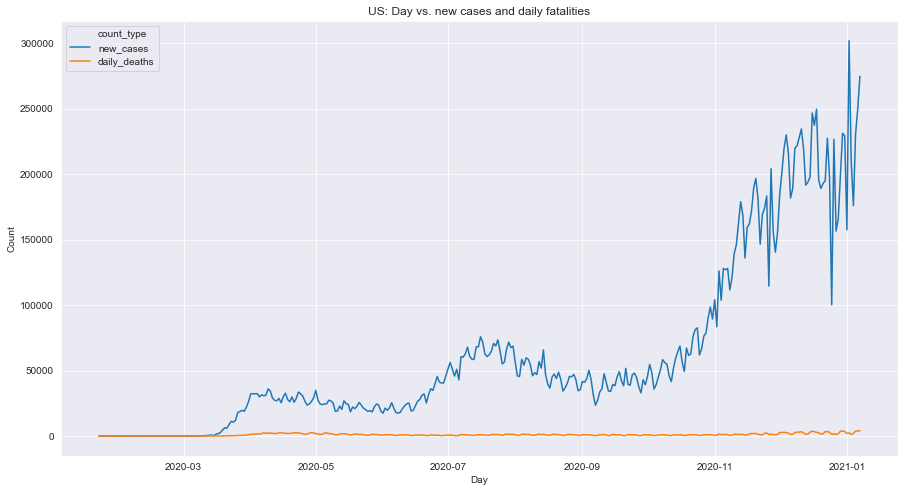

In [17]:
plot_daily_cases_and_deaths("US")

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


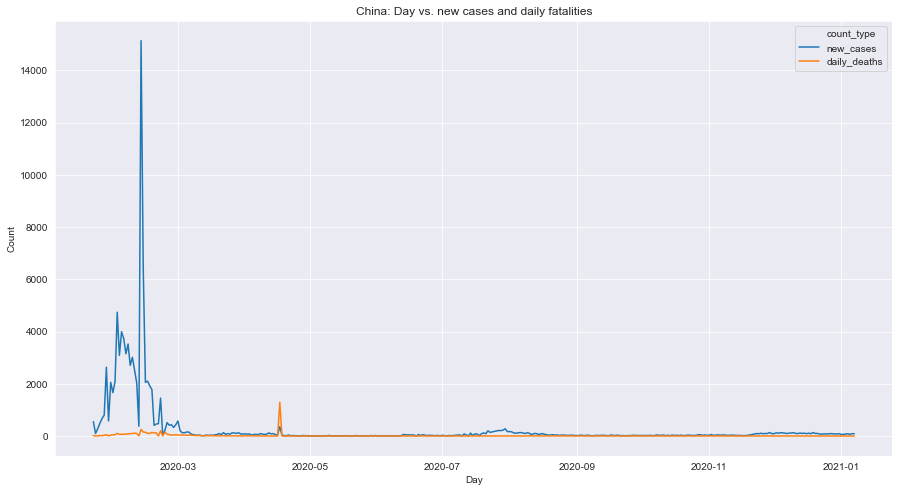

In [18]:
plot_daily_cases_and_deaths("China")

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


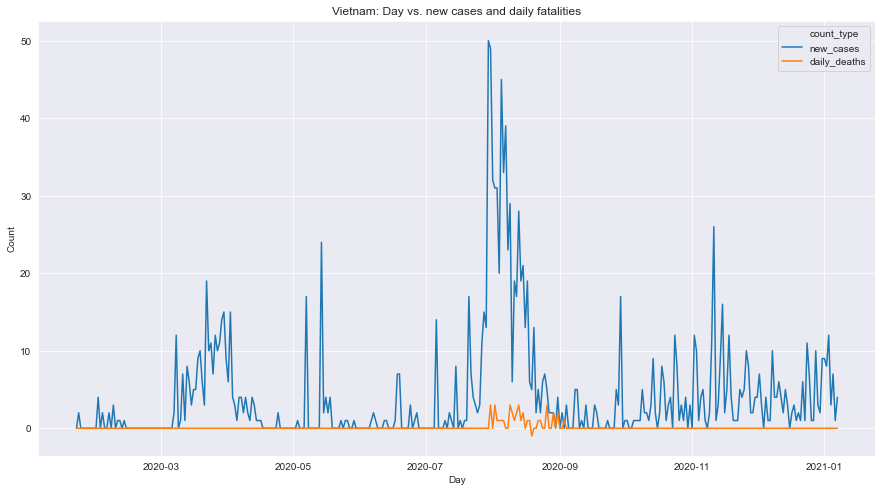

In [19]:
plot_daily_cases_and_deaths("Vietnam")